# Exploratory Data Analysis on Order Book Dynamics of Ethereum


_____________________________________

Made by: Yelena Razzhivina, yelena.rz@outlook.com

Link to the youtube video: https://youtu.be/ljKsUQcTc2A

# 1. Aims, objectives and background

## 1.1 Introduction

Lately, my attention has been drawn towards the cryptocurrency market, and I have been keen on exploring data science techniques to analyze it. While conventional methods of predicting and analyzing the market rely on basic metrics like low, high, opening, and closing prices, I am convinced that a more comprehensive approach is needed to gain a deeper understanding. To this end, I find the Depth of Market (DOM) to be a captivating aspect that warrants closer scrutiny. DOM is the entire order book of buying and selling prices, recorded over time, and provides a distinct viewpoint into market dynamics that can aid in making informed investment decisions.

## 1.2 Aims and objectives

This study aims to provide an informative analysis on Ethereum.


The primary objectives of this study are as follows:

-   Process the evolution of the order book over time:
    1.  Assess market liquidity 
    2.  Who dominates the price, the seller or buyer?
    3.  Investigate trading activity patterns 
    4.  Bid-ask spread
    5.  Determine the frequency and distribution of orders

## 1.3 Steps of the project

1. Obtain Dom data from Binance 
2. Preprocessing data
3. Exploratory data analysis
4. Conclusions

## 1.4 Dataset and Libraries

Dataset:

The Binance platform provides free historical trade data that can be accessed through their website at https://www.binance.com/en/landing/data. This data is downloaded and stored in a dataframe, containing information on buy and sell orders, as well as timestamps.


Libraries and Tools:


It explores the utilization of the Python programming language and the Jupyter Notebook environment for the analysis. Leveraging the capabilities of libraries such as pandas, numpy, and matplotlib, the study employs bar charts and plot charts to visualize market trends effectively. The methodology focuses on data manipulation and analysis using pandas and numpy, while matplotlib facilitates the creation of graphical representations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ethics of data source

This data, available for specified time intervals, is publicly accessible and does not necessitate registration. However, it is important to note that according to their privacy policy, the data should not be utilized for commercial purposes.

# 2. Data Creation using Binance Historical Market Data

I have acquired the market data of spot trades for the month of February 2024 from Binance's website in CSV format.

In [2]:
df = pd.read_csv("ETHUSDT-trades-2024-02.csv")

In [3]:
df

,1294754183,2283.15000000,0.02570000,58.67695500,1706745600000,False,True
0,1294754184,2283.15,0.0212,48.402780,1706745600000,False,True
1,1294754185,2283.14,0.0286,65.297804,1706745600002,True,True
2,1294754186,2283.14,0.0386,88.129204,1706745600004,True,True
3,1294754187,2283.14,0.0352,80.366528,1706745600004,True,True
4,1294754188,2283.15,0.0175,39.955125,1706745600004,False,True
...,...,...,...,...,...,...,...
31930986,1326685170,3340.09,0.0120,40.081080,1709251199998,True,True
31930987,1326685171,3340.10,0.0290,96.862900,1709251199998,False,True
31930988,1326685172,3340.09,0.0200,66.801800,1709251199998,True,True
31930989,1326685173,3340.09,0.0162,54.109458,1709251199999,True,True


## Preprocessing

Rename columns, where 
- id: Unique key given to each trade

- price: Original price for 1 ethereum

- qty: Quantity traded

- quoteQty: Amount in USDT spend for a quantity

- time: Time in milliseconds

- isBuyerMaker: if true it is 'sell', if false, it is 'buy'

- bestPrice: Match of two orders (here it is always true)

In [4]:
newColumnNames = {
    '1294754183': 'id',
    '2283.15000000': 'price',
    '0.02570000': 'qty',
    '58.67695500': 'quoteQty',
    '1706745600000': 'time',
    'False': 'isBuyerMaker',
    'True': 'bestPrice',
}
df = df.rename(columns=newColumnNames)

Check for empty values

In [5]:
df.isnull().any()

id              False
price           False
qty             False
quoteQty        False
time            False
isBuyerMaker    False
bestPrice       False
dtype: bool

Verify the accuracy of column data types.

In [6]:
df.dtypes

id                int64
price           float64
qty             float64
quoteQty        float64
time              int64
isBuyerMaker       bool
bestPrice          bool
dtype: object

Firstly, the integer timestamps in the 'time' column are converted from milliseconds since the Unix epoch into a human-readable date format, and set it as an index. Additionally, for clarity distinguishing between sell and buy transactions, a novel labeling scheme is introduced based on the 'isBuyerMaker' attribute.

In [7]:
df['time'] = pd.to_datetime(df['time'], unit = 'ms')

df['label'] = df['isBuyerMaker'].apply(lambda x: 'sell' if x else 'buy')

df.set_index('label', inplace =True)
df.set_index(['time', df.index], inplace =True)
df

id    price     qty   quoteQty  \
time                    label                                           
2024-02-01 00:00:00.000 buy    1294754184  2283.15  0.0212  48.402780   
2024-02-01 00:00:00.002 sell   1294754185  2283.14  0.0286  65.297804   
2024-02-01 00:00:00.004 sell   1294754186  2283.14  0.0386  88.129204   
                        sell   1294754187  2283.14  0.0352  80.366528   
                        buy    1294754188  2283.15  0.0175  39.955125   
...                                   ...      ...     ...        ...   
2024-02-29 23:59:59.998 sell   1326685170  3340.09  0.0120  40.081080   
                        buy    1326685171  3340.10  0.0290  96.862900   
                        sell   1326685172  3340.09  0.0200  66.801800   
2024-02-29 23:59:59.999 sell   1326685173  3340.09  0.0162  54.109458   
                        sell   1326685174  3340.09  0.0104  34.736936   

                               isBuyerMaker  bestPrice  
time                    label                           
2024-02-01 00:00:00.000 buy           False       True  
2024-02-01 00:00:00.002 sell           True       True  
2024-02-01 00:00:00.004 sell           True       True  
                        sell           True       True  
                        buy           False       True  
...                                     ...        ...  
2024-02-29 23:59:59.998 sell           True       True  
                        buy           False       True  
                        sell           True       True  
2024-02-29 23:59:59.999 sell           True       True  
                        sell           True       True  

[31930991 rows x 6 columns]

Drop 'id' and 'bestPrice' columns from the dataset since they do not contribute any more meaningful information and are irrelevant for this analysis.

In [8]:
df=df.drop(columns=['bestPrice', 'id', 'isBuyerMaker'])
df

price     qty   quoteQty
time                    label                            
2024-02-01 00:00:00.000 buy    2283.15  0.0212  48.402780
2024-02-01 00:00:00.002 sell   2283.14  0.0286  65.297804
2024-02-01 00:00:00.004 sell   2283.14  0.0386  88.129204
                        sell   2283.14  0.0352  80.366528
                        buy    2283.15  0.0175  39.955125
...                                ...     ...        ...
2024-02-29 23:59:59.998 sell   3340.09  0.0120  40.081080
                        buy    3340.10  0.0290  96.862900
                        sell   3340.09  0.0200  66.801800
2024-02-29 23:59:59.999 sell   3340.09  0.0162  54.109458
                        sell   3340.09  0.0104  34.736936

[31930991 rows x 3 columns]

Aggregate the time data to ensure it can be processed in second intervals and mean of price, sum of qty and quoteQty numerical data, to make it more manageable to analyze.

In [9]:
df = df.groupby([pd.Grouper(freq='s', level='time'), 'label']).agg({'price': 'mean', 'qty': 'sum', 'quoteQty': 'sum'})

In [10]:
df.head(10)

price      qty      quoteQty
time                label                                 
2024-02-01 00:00:00 buy    2283.150   0.4886   1115.547090
                    sell   2283.140   0.9438   2154.827532
2024-02-01 00:00:01 buy    2283.150   0.1531    349.550265
                    sell   2283.140   0.0864    197.263296
2024-02-01 00:00:02 buy    2283.150   0.0261     59.590215
                    sell   2283.140   0.2626    599.552564
2024-02-01 00:00:03 buy    2283.150   0.0573    130.824495
                    sell   2283.140   0.0433     98.859962
2024-02-01 00:00:04 buy    2283.010   0.0030      6.849030
                    sell   2283.052  13.7446  31380.192814

It is unnecessary to keep both 'buy' and 'sell' labels for one second, so by calculating the difference between the quantities of the two orders and saving the result in the DataFrame.

In [11]:
indices_to_drop = []

# Checking if 'qty' for 'buy' is bigger than 'qty' for 'sell'
for timestamp in df.index.levels[0]:
    try:
        buy_qty = df.loc[(timestamp, 'buy'), 'qty']
        sell_qty = df.loc[(timestamp, 'sell'), 'qty']
        buy_quote_qty = df.loc[(timestamp, 'buy'), 'quoteQty']
        sell_quote_qty = df.loc[(timestamp, 'sell'), 'quoteQty']

        if buy_qty > sell_qty:
            df.loc[(timestamp, 'buy'), 'qty'] -= sell_qty
            df.loc[(timestamp, 'buy'), 'quoteQty'] -= sell_quote_qty
            indices_to_drop.append((timestamp, 'sell'))
        else:
            df.loc[(timestamp, 'sell'), 'qty'] -= buy_qty
            df.loc[(timestamp, 'sell'), 'quoteQty'] -= buy_quote_qty
            indices_to_drop.append((timestamp, 'buy'))
    except KeyError:
        pass

# Dropping rows based on the list of indices to drop
df.drop(index=indices_to_drop, inplace=True)

In [12]:
df.head(10)

,,price,qty,quoteQty
time,label,,,
2024-02-01 00:00:00,sell,2283.140000,0.4552,1039.280442
2024-02-01 00:00:01,buy,2283.150000,0.0667,152.286969
2024-02-01 00:00:02,sell,2283.140000,0.2365,539.962349
2024-02-01 00:00:03,buy,2283.150000,0.0140,31.964533
2024-02-01 00:00:04,sell,2283.052000,13.7416,31373.343784
2024-02-01 00:00:05,buy,2282.890000,2.3986,5475.741538
2024-02-01 00:00:06,sell,2282.672564,24.4350,55776.711644
2024-02-01 00:00:07,sell,2282.430000,3.0622,6989.257025
2024-02-01 00:00:08,buy,2282.440000,0.1314,299.912616


## Exploratory data analysis

Who dominates the price: the seller or the buyer?

A plot is created featuring two lines representing 'buy' and 'sell' actions, with time segmented by day, facilitating a clear observation of monthly trends.

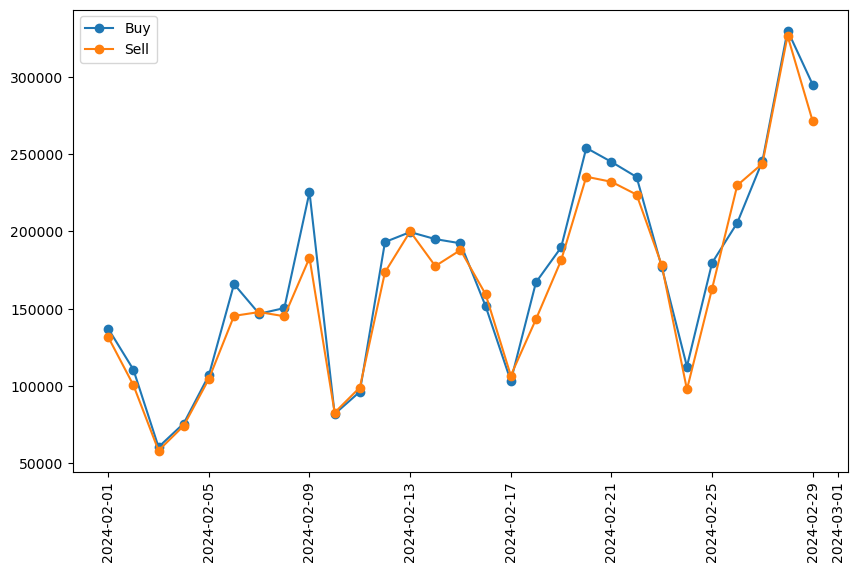

In [20]:
buy_data = df.loc[df.index.get_level_values('label') == 'buy'][['qty']]
sell_data = df.loc[df.index.get_level_values('label') == 'sell'][['qty']]

buy_data.reset_index(level='label', drop=True, inplace=True)
sell_data.reset_index(level='label', drop=True, inplace=True)

buy_data = buy_data.groupby(pd.Grouper(freq='D', level='time')).sum()
sell_data = sell_data.groupby(pd.Grouper(freq='D', level='time')).sum()

plt.figure(figsize=(10, 6)) 
plt.plot(buy_data, label='Buy', marker='o')  
plt.plot(sell_data, label='Sell', marker='o')
plt.xticks(rotation=90)
plt.legend()

It is evident that both buyers and sellers have been active in the Ethereum market, but buyers have exhibited a stronger presence. By scrutinizing the market order book data from the previous month, it is clear that Ethereum is surrounded by a bullish sentiment. This implies that traders are optimistic about Ethereum's growth potential, motivating them to either invest in it for the long haul or speculate on its price increase. The persistent dominance of buy orders over sell orders is a testament to this optimism.

However, there were a few occurrences during the month (07/02, 11/02, 16/02), and notably on 26/02, where sell volumes slightly exceeded buy volumes, indicating intermittent selling pressure amidst an overall bullish trend. This could signify profit-taking or short-term corrections within the broader upward trend. Let us now analyze the overall sales and purchases volume.

In [14]:
print('Sold', df.loc[df.index.get_level_values('label') == 'sell']['qty'].sum())
print('Bought', df.loc[df.index.get_level_values('label') == 'buy']['qty'].sum())

Sold 4801176.000599998
Bought 5025918.910599999


This pattern suggests that buyers were more active than sellers during this month, further supporting the bullish sentiment. It indicates that overall, there were more Ethereum bought than sold during February 2024, thus driving the price of Ethereum upwards most of the time. 

2. Liquidity analysis. It is how easy an asset, such as Ethereum, can be bought or sold in the market without causing significant price changes. It depends on various factors, in this analysis only two considered:
- Bid-Ask Spread
- Volume at Price

The bid-ask spread is a measure of the supply and demand. To calculate the bid-ask spread, subtract the highest buy price from the lowest sell price. Additionally, it is common practice to express the bid-ask spread as a percentage of the mid-price, which gives a standardized measure of the bid-ask spread to the Ethereum's price.

In [15]:
lowest_sell = df.loc[df.index.get_level_values('label') == 'sell']['price'].min()
highest_buy = df.loc[df.index.get_level_values('label') == 'buy']['price'].max()

bidask_spread = highest_buy - lowest_sell
print('Bid-ask spread:', bidask_spread)

mid_price = (highest_buy + lowest_sell) / 2

bidask_spread_percentage = (bidask_spread / mid_price) * 100
print('Bid-Ask Spread Percentage:', bidask_spread_percentage, '%')

Bid-ask spread: 1281.9218382352942
Bid-Ask Spread Percentage: 44.48518152300535 %


Bid-ask spread percentage of 44.48% indicates that the bid-ask spread is significant compared to the mid-price, potentially suggesting lower liquidity. Lower liquidity result in increased price volatility, as the market may react more sharply to individual trades or news events. 

In assessing investment opportunities, investors typically prefer securities with narrower bid-ask spreads, as they indicate deeper liquidity and potentially lower transaction costs. Wide spreads, such as the one indicated by a 44.48% spread percentage, may prompt investors to exercise caution and consider the potential implications of trading in a less liquid market.

To better understand the situation, it is helpful to investigate the Volume at Price. This involves grouping prices by bins and calculating the volume at each price level, including volumes of buy and sell orders.

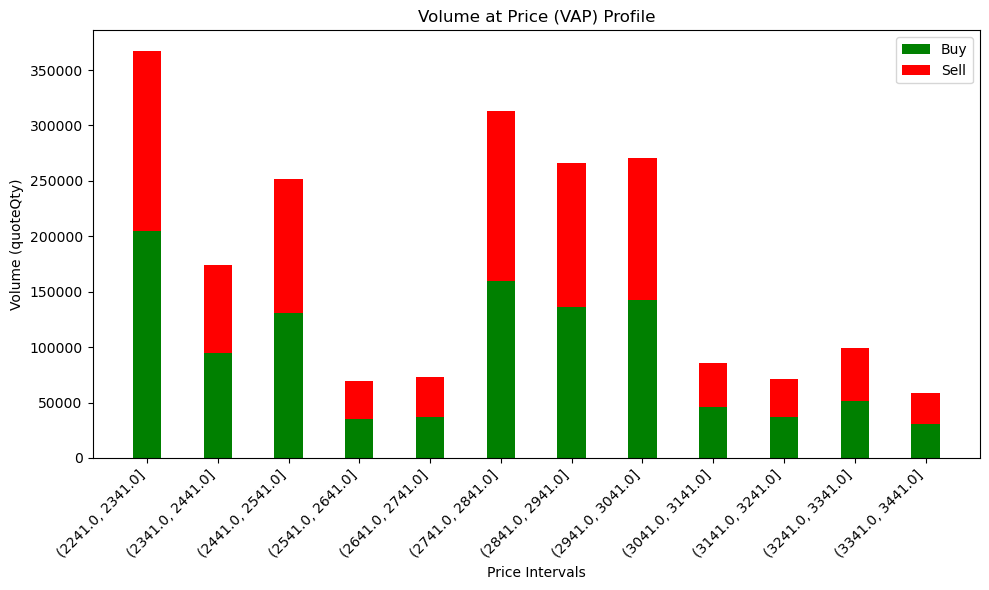

In [16]:
round_prices = pd.Series(df['price'].round())
price_intervals = pd.interval_range(start=round_prices.min(), end=round_prices.max(), freq=100)

# Calculate volume at price (VAP) profile
vap_buy = pd.cut(round_prices[df.index.get_level_values('label') == 'buy'], bins=price_intervals).value_counts().sort_index()
vap_sell = pd.cut(round_prices[df.index.get_level_values('label') == 'sell'], bins=price_intervals).value_counts().sort_index()

# Plot VAP profile
plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(vap_buy.index.astype(str), vap_buy.values, width=bar_width, color='green', label='Buy')
plt.bar(vap_sell.index.astype(str), vap_sell.values, width=bar_width, color='red', label='Sell', bottom=vap_buy.values)
plt.xlabel('Price Intervals')
plt.ylabel('Volume (quoteQty)')
plt.title('Volume at Price (VAP) Profile')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

The data reveals that the 2241-2341, 2441-2541, and 2741-3041 price ranges exhibit higher trading volume, indicating significant activity in these areas. This suggests a strong demand for Ethereum at these levels and a potential for further price appreciation, as evidenced by the VAP profile. 

Overall, these observations point towards a bullish market sentiment with a notable presence of buyers, demonstrating confidence in Ethereum's future potential and a willingness to hold or speculate on its price. However, it's important to note that the market remains volatile, as evidenced by the bid-ask spread percentage. To gain further insight, we analyze buy and sell statistics using the .describe() function.

In [17]:
print('Buy\n', df[df.index.get_level_values('label') == 'buy'].describe(), '\n')
print('Sell\n', df[df.index.get_level_values('label') == 'sell'].describe())

Buy
               price           qty      quoteQty
count  1.131562e+06  1.131562e+06  1.131562e+06
mean   2.744111e+03  4.441576e+00  1.252934e+04
std    3.344428e+02  1.915782e+01  5.460709e+04
min    2.241749e+03  8.673617e-19 -4.400000e-04
25%    2.428552e+03  5.690000e-02  1.523750e+02
50%    2.785071e+03  4.481000e-01  1.215341e+03
75%    2.963070e+03  2.809600e+00  7.780989e+03
max    3.522644e+03  2.539641e+03  7.565593e+06 

Sell
               price           qty      quoteQty
count  1.013569e+06  1.013569e+06  1.013569e+06
mean   2.754141e+03  4.736901e+00  1.337553e+04
std    3.264249e+02  1.841764e+01  5.265932e+04
min    2.240722e+03  0.000000e+00 -5.002958e+00
25%    2.466559e+03  8.120000e-02  2.179496e+02
50%    2.789280e+03  5.711000e-01  1.558279e+03
75%    2.961350e+03  3.246600e+00  9.050692e+03
max    3.522383e+03  2.175493e+03  6.415997e+06


Quantity Traded:
The mean quantities bought and sold are similar, with buyers acquiring slightly less Ethereum on average compared to what sellers are offering. Both buying and selling quantities show considerable variability, as indicated by their large standard deviations.

Trade Frequency:
More buy orders were executed compared to sell orders, as evidenced by the higher count of buy orders. However, the disparity in count between buy and sell orders is not substantial, indicating relatively balanced trading activity between buyers and sellers.

Minimum and Maximum Values:
While the minimum prices for both buying and selling activities are similar, the buy price tends to be marginally lower. So, if the minimum buy price is slightly lower than the minimum sell price in a dataset consisting solely of executed orders, it suggests that buyers were able to purchase Ethereum at slightly lower prices compared to what sellers were willing to accept for their Ethereum.

Price Distribution:
The average purchase price is lower than the average selling price, suggesting that, on average, buyers are paying slightly less than sellers are receiving. Both buying and selling prices exhibit relatively similar distributions, though buyers' standard deviation is higher, indicating price volatility.

Further Relative Changes of price analysis takes place.

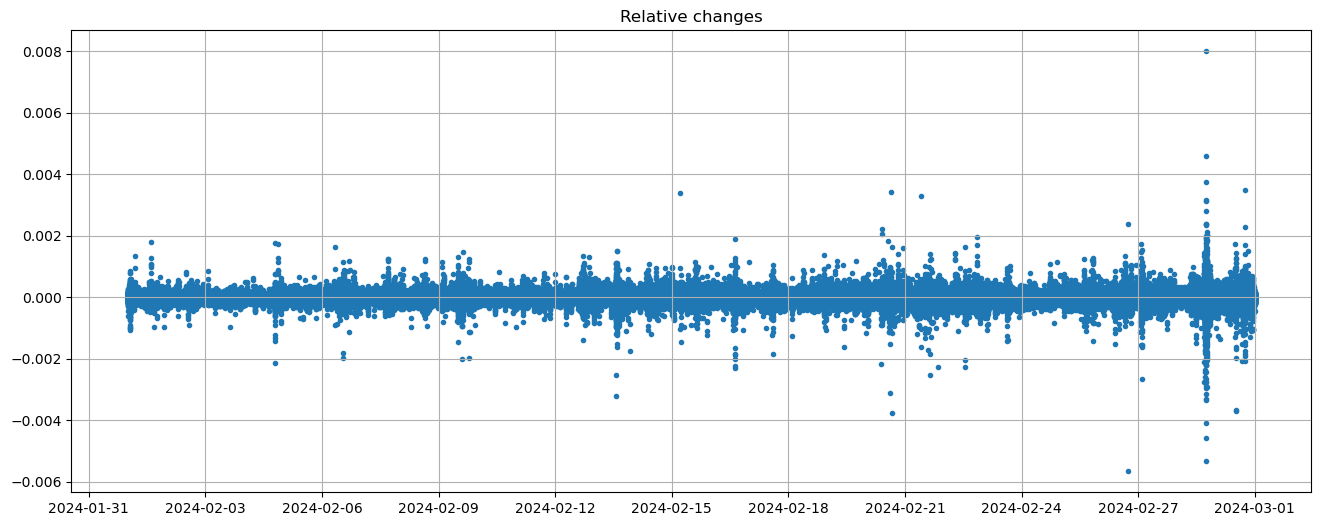

In [18]:
percChange = df.price.pct_change()

fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df.index.get_level_values('time'), percChange, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.title('Relative changes')
plt.grid()
plt.show()

On the second half of the month the analysis reveals a notable spike in percentage changes, suggesting heightened volatility within the Ethereum market. The period spanning from February 27th to March 1st, 2024, we observe an especially pronounced surge in percentage changes. This period likely corresponds to a significant event or catalyst that exerted substantial influence on Ethereum prices. The sharp increase in percentage changes during this timeframe underscores the dynamic nature of cryptocurrency markets, where price movements occur rapidly and dramatically within short timeframes.

Examine the current phase of the cryptocurrency market cycles:

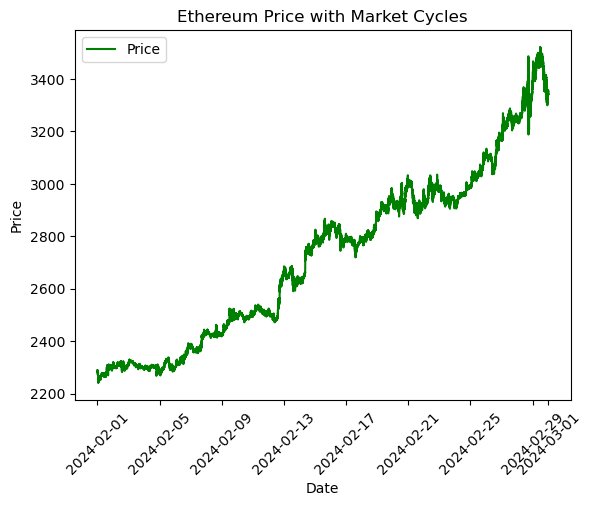

In [19]:
plt.plot(df.index.get_level_values('time'), df['price'], color='green', label='Price')

# Add legends and labels
plt.title('Ethereum Price with Market Cycles')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()

Here we observe a markup phase. It is characterized by:
- prices consistently increase, and investors are attracted by positive media attention and growing market demand
- skilled investors use technical analysis to identify higher lows and higher highs, and the value of cryptocurrencies appreciates
- market sentiment shifts from neutrality to optimism and excitement, and novice investors are driven by FOMO (Fear of Missing Out)

# 3. Conclusions and recommendations 

This research of executed orders of Ethereum of February 2024 revealed various findings:

In the current market environment, we're observing a phase reminiscent of the 'Markup Phase' within the accumulation stage. This phase is characterized by rapid price growth, often fueled by the Fear of Missing Out (FOMO) phenomenon prevalent among novice investors. As prices ascend, there's a reinforcing confidence in further appreciation, igniting bullish momentum. Factors such as regulatory advancements and institutional adoption within the crypto sphere amplify this optimistic sentiment, adding fuel to the already fervent market.

However, amidst this bullish fervor, there are signals of caution, notably the widening bid-ask spread. This departure from typical market conditions indicates heightened risk and volatility. Prices are fluctuating rapidly, presenting both opportunities for significant gains and risks of substantial losses within short timeframes. In such conditions, prudent risk management strategies become imperative to navigate the market effectively.

Additionally, concerns about low liquidity add another layer of complexity to the analysis. Cryptocurrencies with low liquidity are particularly vulnerable to pronounced price swings, exacerbating the already heightened volatility. The challenge of executing trades in illiquid markets can further compound risks, especially during times of market stress. Insufficient liquidity may impede the ability to sell assets swiftly, potentially leading to larger losses if selling demands exceed available liquidity.

In essence, while the current market exudes optimism and growth potential, it's crucial for investors to remain vigilant and employ robust risk management practices. Awareness of liquidity constraints and bid-ask spread dynamics can help mitigate risks and enhance decision-making in navigating the volatile crypto landscape.

### Project limitations:
The findings should also be taken with a gain of salt for a number of reasons:

- Limited Time Frame: The analysis only covers a one-month period, which may not provide a comprehensive view of long-term trends or patterns.

- External Influences: External factors such as regulatory developments, technological advancements, and macroeconomic trends can significantly impact cryptocurrency prices. These factors were not accounted for in the analysis and should be considered when interpreting the results.

- Market Psychology: Market sentiment and investor psychology play a crucial role in determining price movements. Factors such as fear, greed, and market manipulation can distort price trends.

- News and Social Media: News events, announcements, and social media discussions can influence market sentiment and trigger price movements. Analyzing sentiment analysis from social media platforms and monitoring news sources can provide valuable context to price changes.

### References 
[1] Binance. Avaliable at https://www.binance.com/en/landing/data

[2] Detailed market phases explanation: https://learn.bybit.com/investing/crypto-market-cycles/

[3] DOM explanation: https://fastercapital.com/topics/what-is-depth-of-market-(dom)-and-why-is-it-important-for-cryptocurrency-traders.html

[4] Market sentiment explanation: https://www.tokenmetrics.com/blog/the-meaning-of-bullish-in-crypto